# Trabajo Semanal 4

In [1]:
from IPython.display import IFrame
IFrame("./TS4.pdf", width=1000, height=1000)

## Simulación Numérica de todo el diseño

A partir de plantilla de pasabajos equivalente tengo:
Orden mínimo necesario: 3
Alfa_min resultante: 26.866687


<IPython.core.display.Math object>


Separandola en sistemas SOS:


<IPython.core.display.Math object>


Se confirma la misma transferencia pasabajos obtenida a mano

----------------------------------------
Transformación a pasabanda normalizado con Q=5


<IPython.core.display.Math object>


Separandola en sistemas SOS:


<IPython.core.display.Math object>


Se confirma la misma transferencia pasabanda obtenida a mano


-----------------------------------------------------------------
A continuación se analiza el pasabanda desnormalizado para comparar gráficos con simulación:


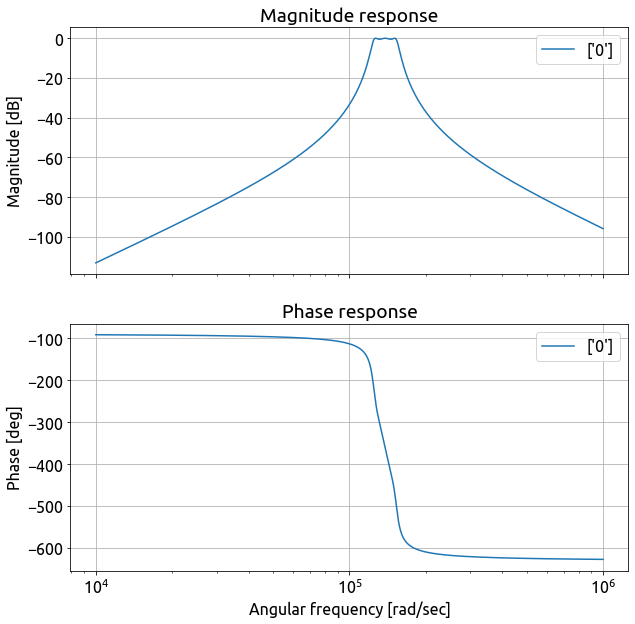

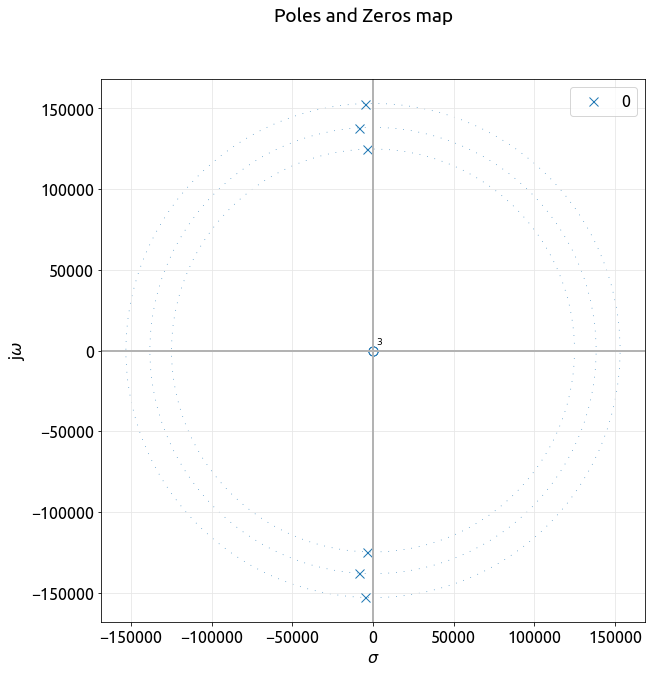

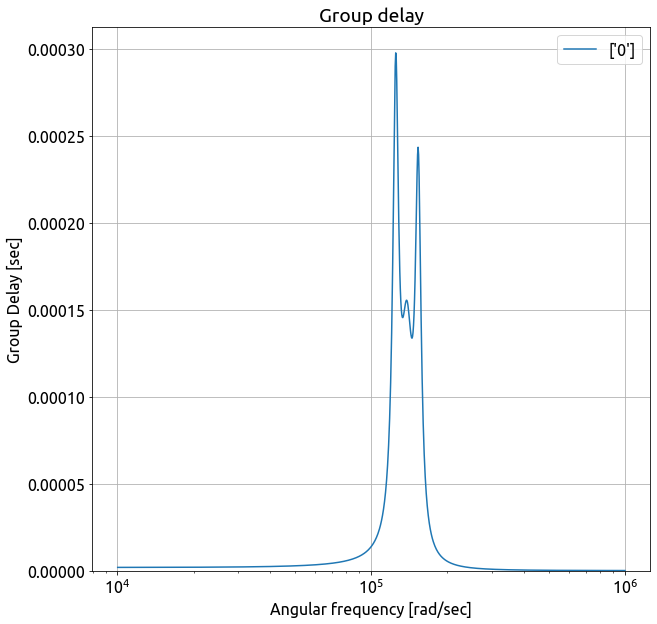

In [32]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import signal as sig # módulo de SciPy

# un módulo adaptado a mis necesidades
import splane as tc2

# Para que el tamaño de la salida sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

# Estilo de los gráficos
##############################################################
fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

npoints = 1000
##############################################################
#Plantilla pasabajo equivalente
wp = 1
ws = 2.60695
alfa_max = 0.5
alfa_min_requerido = 16

#Epsilon cuadrado
e_2 = 10**(alfa_max/10)-1

#Encuentro el orden necesario

for n in range(1,6):
    alfa_min = 10*np.log10(1+e_2 * (np.cosh(n * np.arccosh(ws)))**2 )
    if alfa_min >= alfa_min_requerido:
        break

print("A partir de plantilla de pasabajos equivalente tengo:")
print("Orden mínimo necesario: %d" %n)
print("Alfa_min resultante: %f" %alfa_min)

#Calculo filtro pasabajos equivalente con aproximación de Chebyshev
num_pb, den_pb = sig.cheby1(n,alfa_max,wp,'lowpass',analog = True, output = 'ba')

pasa_bajos = sig.TransferFunction(num_pb,den_pb)

#Muestro la expresión de la transferencia
tc2.pretty_print_lti(pasa_bajos)

#La muestro separada en transferencias de segundo y primer orden
SOS_pb = tc2.tf2sos_analog(num_pb, den_pb)

print("\nSeparandola en sistemas SOS:")
tc2.pretty_print_SOS(SOS_pb)
print("\nSe confirma la misma transferencia pasabajos obtenida a mano")

#Transformo el pasabajos a pasabanda normalizado
print("\n----------------------------------------")
print("Transformación a pasabanda normalizado con Q=5")
Q = 5
num_pbanda, den_pbanda = sig.lp2bp(num_pb, den_pb, wo = 1, bw = 1/Q)

pasa_banda = sig.TransferFunction(num_pbanda,den_pbanda)

#Muestro la expresión de la transferencia
tc2.pretty_print_lti(pasa_banda)

#La muestro separada en transferencias de segundo y primer orden
SOS_pbanda = tc2.tf2sos_analog(num_pbanda, den_pbanda)

print("\nSeparandola en sistemas SOS:")
tc2.pretty_print_SOS(SOS_pbanda)
print("\nSe confirma la misma transferencia pasabanda obtenida a mano")

print("\n\n-----------------------------------------------------------------")
print("A continuación se analiza el pasabanda desnormalizado para comparar gráficos con simulación:")
wo = 2*np.pi*22e3
num_pbanda_desnorm, den_pbanda_desnorm = sig.lp2bp(num_pb, den_pb, wo, bw = wo/Q)

pasa_banda_desnorm = sig.TransferFunction(num_pbanda_desnorm,den_pbanda_desnorm)

tc2.analyze_sys(pasa_banda_desnorm,4,6)

#sistema = sig.TransferFunction(np.convolve(num, num),np.convolve(den1, den2))

#pretty_print_lti(sistema)

#analyze_sys(sistema,3,6) #Funcion cambiada para poder determinar frec inicial y final de gráficos

### Al ser Chebyshev se observa la oscilación en la banda de paso, y una pendiente más pronunciada en la banda de transición.

## Simulación circuital de Pasa Banda de secciones pasivas

### Circuito:
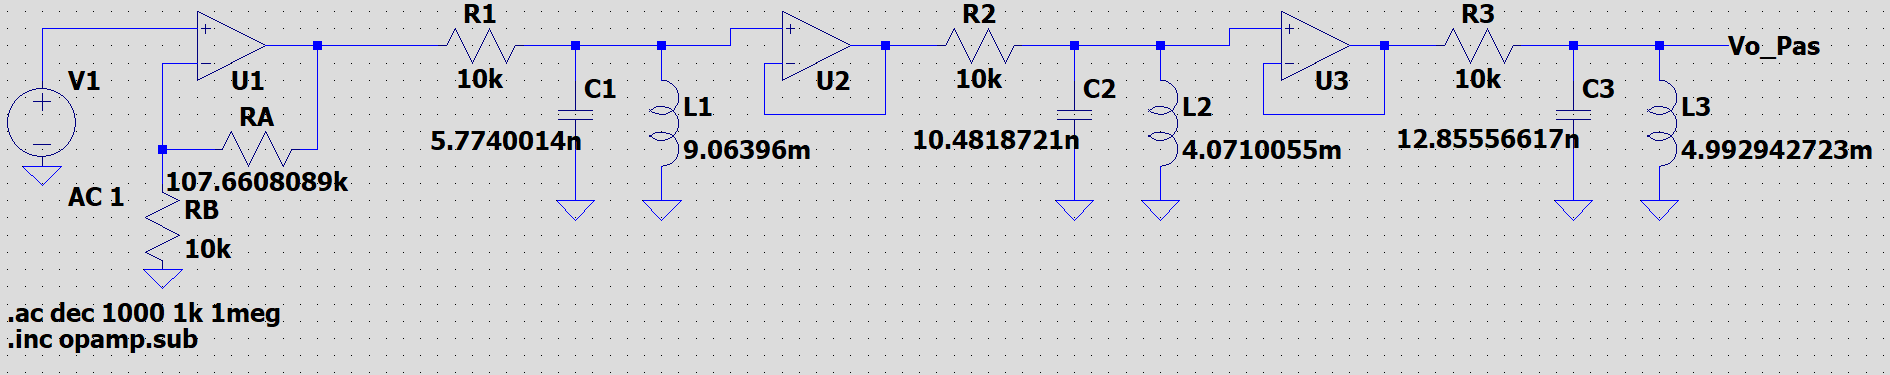

### La transferencia en módulo y fase completa:
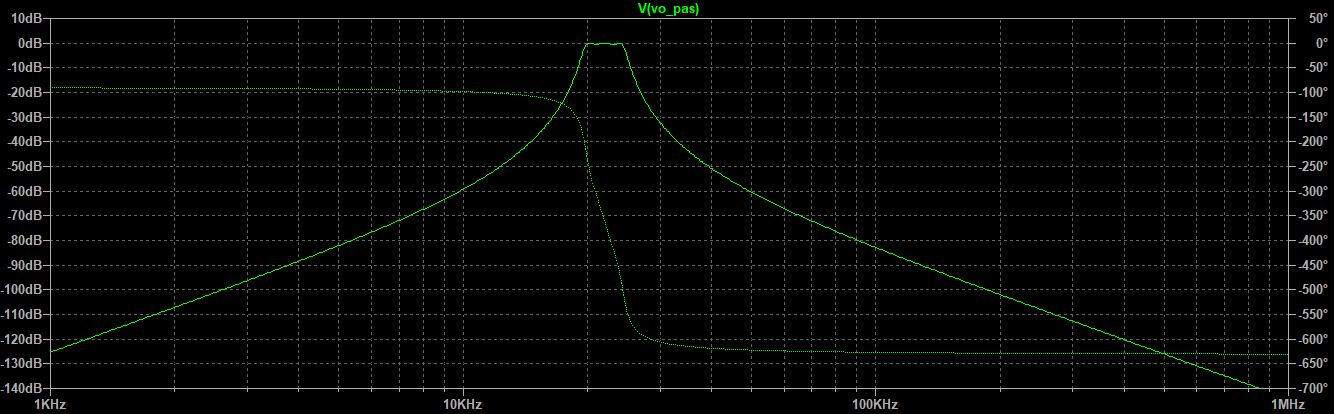

### Verificación de requerimientos de plantilla:
Banda de paso: fo y alfa_max
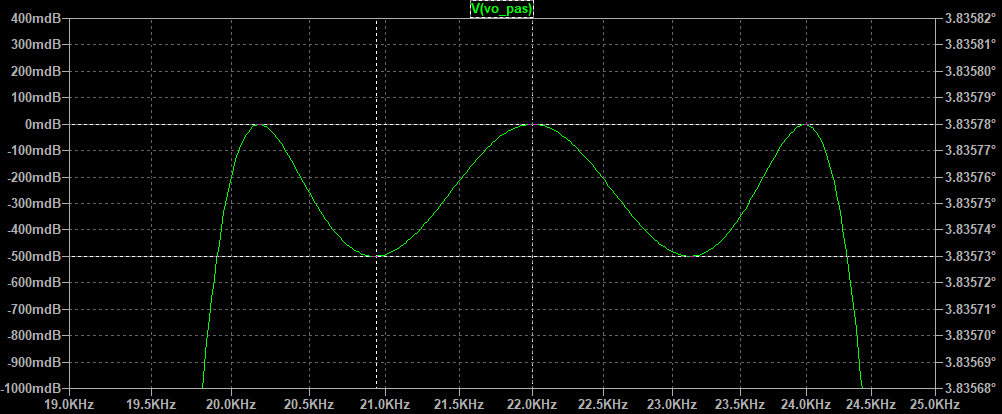
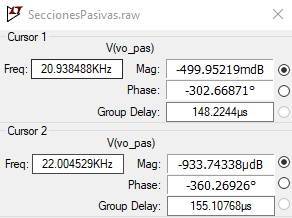

Frecuencias de paso:
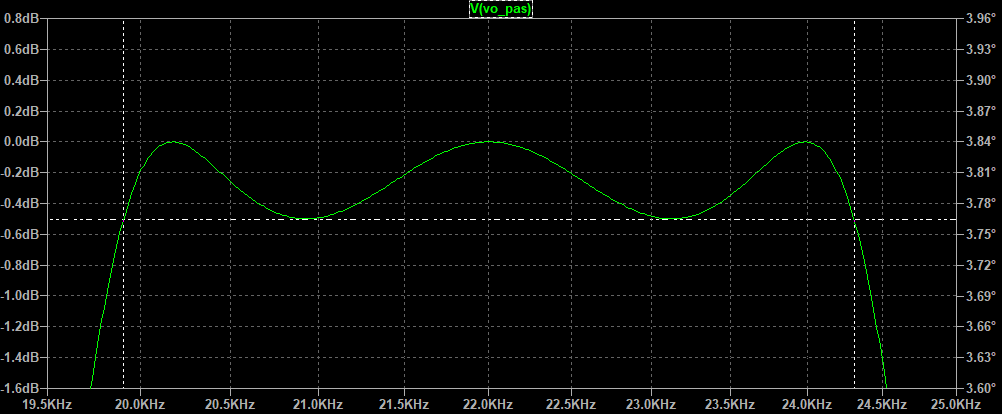
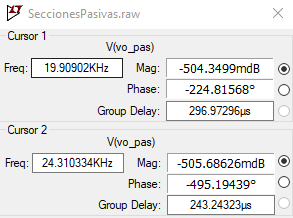

Frecuencias de stop:
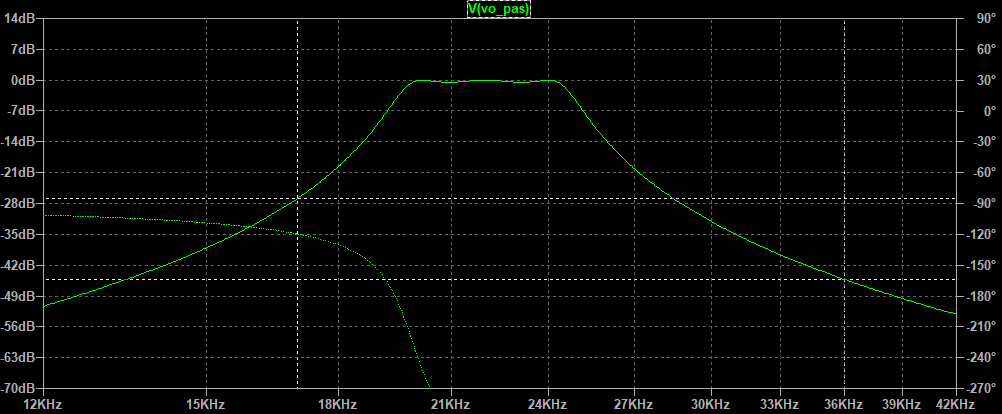
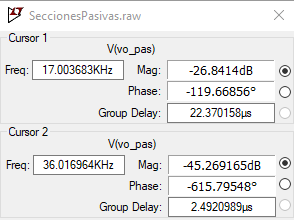

## Simulación circuital de Pasa Banda activado

### Circuito:
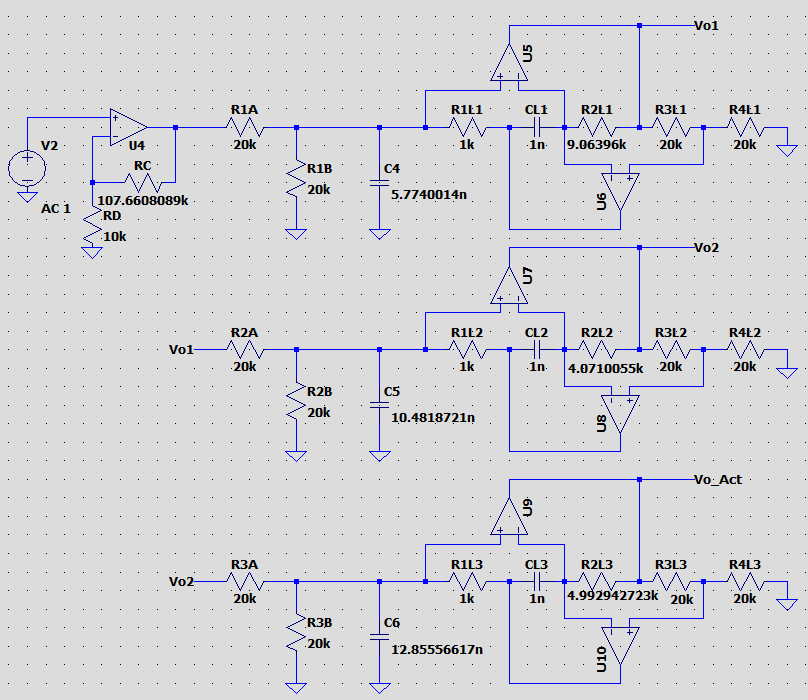

### Transferencia en módulo y fase, superpuesta la transferencia del circuito de secciones pasivas:
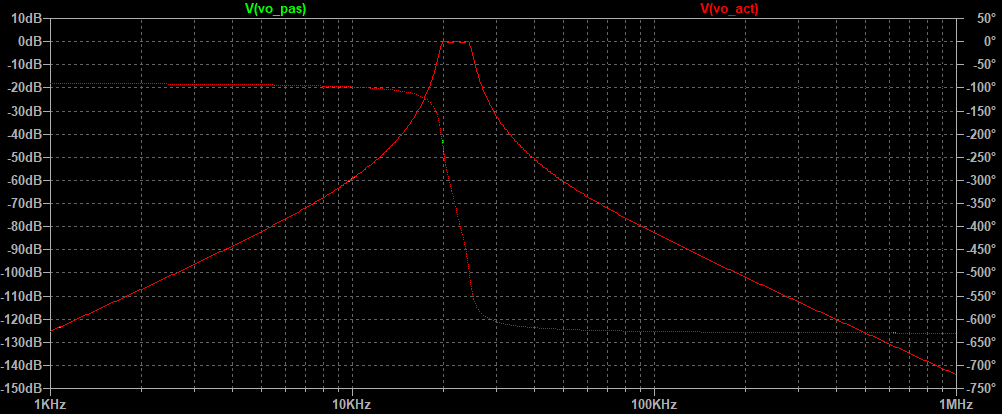

Completamente superpuestas ambas transferencias, en módulo y fase.